# Multiple hypothesis testing: QPSK

We'll look at multiple hypothesis testing through digital communications. We'll simulate a simple quaternary phase shift keying (QPSK) system and build its matched filter receiver.

First, we'll define the (discrete-time) carrier frequency and the duration of each transmit symbol and plot all four symbols.

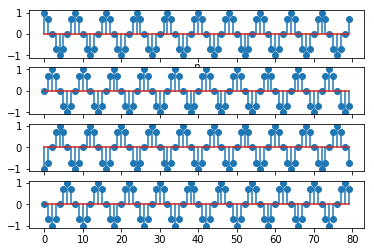

In [7]:
import numpy as np
import matplotlib.pyplot as plt

omega = np.pi/4
T = np.round(4*np.pi/omega*5).astype(int) #This is the number of samples of the cosine that each symbol will consist of

n = np.arange(0,T)
s = np.zeros((4,T))
s[0,:] = np.cos(omega*n) + 0*np.sin(omega*n)
s[1,:] = 0*np.cos(omega*n) + np.sin(omega*n)
s[2,:] = -1*np.cos(omega*n) + 0*np.sin(omega*n)
s[3,:] = 0*np.cos(omega*n) + -1*np.sin(omega*n)

fig, axs = plt.subplots(nrows=4, sharex=True)

axs[0].stem(n,s[0,:])
axs[1].stem(n,s[1,:])
axs[2].stem(n,s[2,:])
axs[3].stem(n,s[3,:])
axs[0].set_xlabel('$n$')

plt.show()

As you can see, the four "symbols" are just cosines with different phases---hence the name!. We'll assume a very simple channel in which the symbols are corrupted by i.i.d. Gaussian noise.

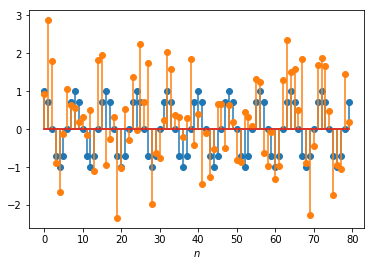

In [8]:
sigma_2 = 1

y = s[0,:] + np.random.normal(0,np.sqrt(sigma_2),T)

plt.stem(n,s[0,:])
plt.stem(n,y,linefmt='C1-',markerfmt='C1o')
plt.gca().set_xlabel("$n$")
plt.show()

As we saw in class, the ideal detector is a matched filter receiver, where we multiply the received signal by a sine and cosine at frequency omega and integrate the results. This gives us 2D points corresponding to the sine and cosine component of the received signal. Let's plot a bunch of realizations of the output of the matched filter.

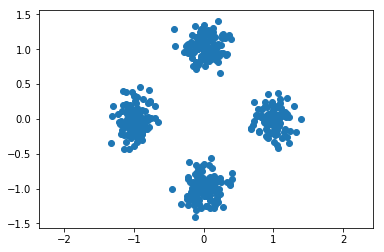

In [9]:
NUM_TRIALS = 500
filter_output = np.zeros((2,NUM_TRIALS))

for i in range(0,NUM_TRIALS):
    h = np.random.choice(4) #which symbol do we send?
    this_s = s[h,:]
    this_y = this_s + np.random.normal(0,np.sqrt(sigma_2),T)
    
    filter_output[0,i] = 2/T*this_y.T@np.cos(omega*n)
    filter_output[1,i] = 2/T*this_y.T@np.sin(omega*n)

plt.scatter(filter_output[0],filter_output[1])
plt.axis('equal')
plt.show()

We see a point cloud for each symbol. How do the clouds change if we alter the noise variance or the symbol time? How do they change if we alter the frequency? The maximum-likelihood detector after the matched filter is simple: find the symbol closest in the Euclidean sense to the matched filter output. 